In [1]:
import tensorflow as tf
import numpy as np
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)


In [5]:
# Initialize weight arrays to save for later use.
# initial_weights = []
# final_weights = []
# diff_weights = []

# Define the different amount of units that will be used in the first layer
unit_range = np.arange(100, 1010, 10)


In [6]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True


In [12]:
for units in unit_range:
    print(f"Number of units: {units}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=units, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])

    # Print initial weights:
    initial_weights.append(model.layers[0].get_weights()[0])
    # Compile model with loss function and optimizer:

    # Instantiate the callback:
    my_callback = MyThresholdCallback(threshold=0.05)

    model.compile(loss='binary_crossentropy', optimizer=tf.compat.v1.train.GradientDescentOptimizer(
        learning_rate=0.1), metrics=['accuracy'])

    model.fit(X, y, epochs=400, batch_size=1,
              callbacks=[my_callback], verbose=1)

    # Print out final weights and compute differences:
    final_weights.append(model.layers[0].get_weights()[0])
    diff_weights.append(final_weights[-1] - initial_weights[-1])


Number of units: 100
Epoch 1/400
 26/100 [======>.......................] - ETA: 0s - loss: 0.7735 - accuracy: 0.5385   

2023-04-20 08:23:59.407916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7233 - accuracy: 0.5700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7032 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6795 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.5900
E

2023-04-20 08:24:37.329905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7327 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.5400
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.5800
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6700
E

2023-04-20 08:25:13.568460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7288 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.6300
E

2023-04-20 08:25:46.967455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7297 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.5600
E

2023-04-20 08:26:31.649309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7383 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6600
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6500
E

2023-04-20 08:27:08.706316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7338 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5300
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5600
E

2023-04-20 08:27:41.750701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7327 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6900 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5400
Epoch 6/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6600
E

2023-04-20 08:28:15.432858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7266 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5600
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6500
E

2023-04-20 08:28:47.590218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7363 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5000
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6800
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.6700
E

2023-04-20 08:29:18.883657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7359 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 0s 5ms/step - loss: 0.7015 - accuracy: 0.4700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6658 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6000
E

2023-04-20 08:29:52.531256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7463 - accuracy: 0.4300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5800
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6348 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.5700
E

2023-04-20 08:30:34.885869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7402 - accuracy: 0.5400
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7070 - accuracy: 0.4400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5800
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6394 - accuracy: 0.6400
E

2023-04-20 08:31:16.536454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 9ms/step - loss: 0.7326 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 1s 9ms/step - loss: 0.7049 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 1s 8ms/step - loss: 0.6967 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 1s 9ms/step - loss: 0.6853 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.6200
E

2023-04-20 08:31:59.199185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7331 - accuracy: 0.5600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.4700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.5900
E

2023-04-20 08:32:41.308711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7230 - accuracy: 0.5600
Epoch 2/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6988 - accuracy: 0.5900
Epoch 3/400
100/100 [==============================] - 1s 8ms/step - loss: 0.6798 - accuracy: 0.6000
Epoch 4/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6887 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6400
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.5400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6569 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6100
E

2023-04-20 08:33:16.582087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7306 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6609 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6519 - accuracy: 0.6000
E

2023-04-20 08:33:48.933891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7395 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.5000
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6563 - accuracy: 0.6300
E

2023-04-20 08:34:25.172983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7225 - accuracy: 0.5800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.6100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6466 - accuracy: 0.6700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6600
E

2023-04-20 08:34:58.502631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7416 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6438 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.6200
E

2023-04-20 08:35:31.087549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7430 - accuracy: 0.4500
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5300
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.6500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.6100
E

2023-04-20 08:36:03.993702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7473 - accuracy: 0.4500
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6638 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6400
E

2023-04-20 08:36:37.232985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7336 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6759 - accuracy: 0.5600
Epoch 7/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6602 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6588 - accuracy: 0.5600
Epoch 9/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6600
E

2023-04-20 08:37:10.346967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7543 - accuracy: 0.4000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6613 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.5900
E

2023-04-20 08:37:43.654726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7377 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6200
E

2023-04-20 08:38:16.660815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7353 - accuracy: 0.4300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7002 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6600
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6400
E

2023-04-20 08:38:48.389294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7216 - accuracy: 0.5100
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6990 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6771 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6628 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6100
E

2023-04-20 08:39:20.109413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7208 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7014 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6504 - accuracy: 0.6500
E

2023-04-20 08:39:52.777782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7369 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.4800
Epoch 5/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.5400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6495 - accuracy: 0.6200
E

2023-04-20 08:40:24.356433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7338 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7010 - accuracy: 0.5100
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6640 - accuracy: 0.6100
E

2023-04-20 08:40:57.545184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7388 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.4600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6600
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6500
E

2023-04-20 08:41:31.109400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7405 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6500
E

2023-04-20 08:42:03.296271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7426 - accuracy: 0.4500
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.4700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6600
E

2023-04-20 08:42:34.386802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7325 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6739 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.7100
E

2023-04-20 08:43:06.527525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7370 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5800
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.6700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6200
E

2023-04-20 08:43:38.636229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7335 - accuracy: 0.5700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.6000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6708 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6400
E

2023-04-20 08:44:08.587184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7282 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7027 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6600
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6600 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6100
E

2023-04-20 08:44:41.054883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7390 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6497 - accuracy: 0.6800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6200
E

2023-04-20 08:45:14.158498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7425 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7008 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.4800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6676 - accuracy: 0.5400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6600
E

2023-04-20 08:45:46.014541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7396 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6100
E

2023-04-20 08:46:17.890970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7408 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7081 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6663 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6236 - accuracy: 0.6300
E

2023-04-20 08:46:50.063360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7299 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6776 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.5100
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.5500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.6100
E

2023-04-20 08:47:24.772624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7164 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7138 - accuracy: 0.4500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6100
E

2023-04-20 08:47:57.383688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7186 - accuracy: 0.5500
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7075 - accuracy: 0.5800
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6769 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6224 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6532 - accuracy: 0.6100
E

2023-04-20 08:48:28.263138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7375 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.6000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6780 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6570 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6567 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6593 - accuracy: 0.5800
E

2023-04-20 08:49:02.017381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7355 - accuracy: 0.5100
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.4900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6527 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.5900
E

2023-04-20 08:49:34.775648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7418 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6200
E

2023-04-20 08:50:07.866552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7286 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7115 - accuracy: 0.4300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6683 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6665 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6494 - accuracy: 0.6400
E

2023-04-20 08:50:41.102970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7258 - accuracy: 0.6000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6616 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6400
E

2023-04-20 08:51:16.449569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7380 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7079 - accuracy: 0.4600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.6100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6305 - accuracy: 0.6800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6300
E

2023-04-20 08:51:49.596362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7318 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6792 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6500
E

2023-04-20 08:52:23.086403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7364 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5100
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.6300
Epoch 5/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.6300
E

2023-04-20 08:52:57.745630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7231 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7123 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.6000
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6554 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6421 - accuracy: 0.6200
E

2023-04-20 08:53:32.922409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7188 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5400
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6594 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5800
E

2023-04-20 08:54:04.450940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7247 - accuracy: 0.5500
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6632 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.5800
E

2023-04-20 08:54:36.425949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7382 - accuracy: 0.4300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.6000
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5500
Epoch 6/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6748 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6600
E

2023-04-20 08:55:08.844281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7128 - accuracy: 0.5700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6456 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6620 - accuracy: 0.6300
E

2023-04-20 08:55:40.005563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7336 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6700
E

2023-04-20 08:56:11.239924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7212 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6610 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6587 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6700
E

2023-04-20 08:56:45.645208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7398 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6762 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6651 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.6100
E

2023-04-20 08:57:18.727607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7422 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7011 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6822 - accuracy: 0.5200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.6700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6264 - accuracy: 0.6900
E

2023-04-20 08:57:52.604383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7493 - accuracy: 0.3900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.4900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6814 - accuracy: 0.4900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6502 - accuracy: 0.6500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.5500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.5400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6383 - accuracy: 0.6300
E

2023-04-20 08:58:25.863226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7479 - accuracy: 0.4300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7056 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6815 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.5500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6596 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6669 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6535 - accuracy: 0.6500
E

2023-04-20 08:59:04.205314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 7ms/step - loss: 0.7293 - accuracy: 0.4500
Epoch 2/400
100/100 [==============================] - 1s 7ms/step - loss: 0.7007 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6937 - accuracy: 0.4700
Epoch 4/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6885 - accuracy: 0.5100
Epoch 6/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6761 - accuracy: 0.5800
Epoch 7/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6696 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6615 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6499 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6200
E

2023-04-20 08:59:40.826205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7335 - accuracy: 0.5100
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6804 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6667 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6408 - accuracy: 0.6300
E

2023-04-20 09:00:15.817880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7339 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5600
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.6400
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6605 - accuracy: 0.6700
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.6100
E

2023-04-20 09:00:49.348642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7299 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.4700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.4900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.5800
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6349 - accuracy: 0.6300
E

2023-04-20 09:01:21.700995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7162 - accuracy: 0.5700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.6100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.4900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6459 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6400
E

2023-04-20 09:01:55.731378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7297 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7006 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.4900
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6863 - accuracy: 0.4900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6200
E

2023-04-20 09:02:28.257337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7387 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.5800
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.6100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.5700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6516 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6595 - accuracy: 0.5600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6600
E

2023-04-20 09:03:02.293370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7008 - accuracy: 0.6000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7023 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6781 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6767 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.5700
E

2023-04-20 09:03:35.560931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7201 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7005 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.5000
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.5600
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6599 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.6800
E

2023-04-20 09:04:17.156060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 5ms/step - loss: 0.7359 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6877 - accuracy: 0.5300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6400
E

2023-04-20 09:04:55.886169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 7ms/step - loss: 0.7327 - accuracy: 0.5400
Epoch 2/400
100/100 [==============================] - 1s 7ms/step - loss: 0.7090 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6955 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6599 - accuracy: 0.6400
Epoch 5/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6869 - accuracy: 0.5400
Epoch 6/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6781 - accuracy: 0.5400
Epoch 7/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6698 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 1s 8ms/step - loss: 0.6690 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6567 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6499 - accuracy: 0.5900
E

2023-04-20 09:05:41.541295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7379 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6597 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6800
E

2023-04-20 09:06:14.165736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7394 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.4700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6797 - accuracy: 0.6200
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6800
E

2023-04-20 09:06:48.064130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7194 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7016 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6806 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6700
E

2023-04-20 09:07:23.199916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7352 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.6000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6646 - accuracy: 0.6300
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6718 - accuracy: 0.5600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6700
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6600
E

2023-04-20 09:08:03.206116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7211 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6700
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6500 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6682 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6200
E

2023-04-20 09:08:39.155165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7321 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6905 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 1s 8ms/step - loss: 0.6912 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6800 - accuracy: 0.5700
Epoch 6/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6783 - accuracy: 0.5500
Epoch 7/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6506 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6594 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6447 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6490 - accuracy: 0.6300
E

2023-04-20 09:09:19.765791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7363 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7026 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.5500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6542 - accuracy: 0.6000
E

2023-04-20 09:09:55.986647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.5400
Epoch 2/400
100/100 [==============================] - 1s 12ms/step - loss: 0.7087 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.6200
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6300
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6100


2023-04-20 09:10:30.003218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 8ms/step - loss: 0.7471 - accuracy: 0.4300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.6300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6300
E

2023-04-20 09:11:05.922391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7335 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 1s 6ms/step - loss: 0.7024 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5200
Epoch 4/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6705 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6579 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6687 - accuracy: 0.6100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.5800
Epoch 9/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6426 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6371 - accuracy: 0.5900
E

2023-04-20 09:11:43.246418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7133 - accuracy: 0.5600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5900
Epoch 3/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6895 - accuracy: 0.5400
Epoch 5/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6766 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6705 - accuracy: 0.6400
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6605 - accuracy: 0.5400
Epoch 9/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6312 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.6300
E

2023-04-20 09:12:19.880318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7364 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.4700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6451 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 1s 7ms/step - loss: 0.6604 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6468 - accuracy: 0.6100
E

2023-04-20 09:12:58.008777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7429 - accuracy: 0.4700
Epoch 2/400
100/100 [==============================] - 0s 5ms/step - loss: 0.7049 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6989 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5600
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6618 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6640 - accuracy: 0.6000
Epoch 10/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6546 - accuracy: 0.6100
E

2023-04-20 09:13:37.389161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7375 - accuracy: 0.4800
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5400
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.5700
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6705 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6704 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6458 - accuracy: 0.6200
E

2023-04-20 09:14:13.315949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7409 - accuracy: 0.5100
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.6100
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6838 - accuracy: 0.6000
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.6400
Epoch 7/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.5800
Epoch 8/400
100/100 [==============================] - 1s 6ms/step - loss: 0.6650 - accuracy: 0.5600
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6400
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.6300
E

2023-04-20 09:14:51.585021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7371 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6857 - accuracy: 0.5300
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6811 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6719 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6100
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.6100
E

2023-04-20 09:15:24.006609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7239 - accuracy: 0.5300
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.5000
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6300
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6698 - accuracy: 0.6100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6728 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6359 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.6200
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6296 - accuracy: 0.6200
E

2023-04-20 09:15:58.571067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 4ms/step - loss: 0.7258 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 5ms/step - loss: 0.7112 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.6100
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5800
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6736 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6654 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6610 - accuracy: 0.5800
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.5800
E

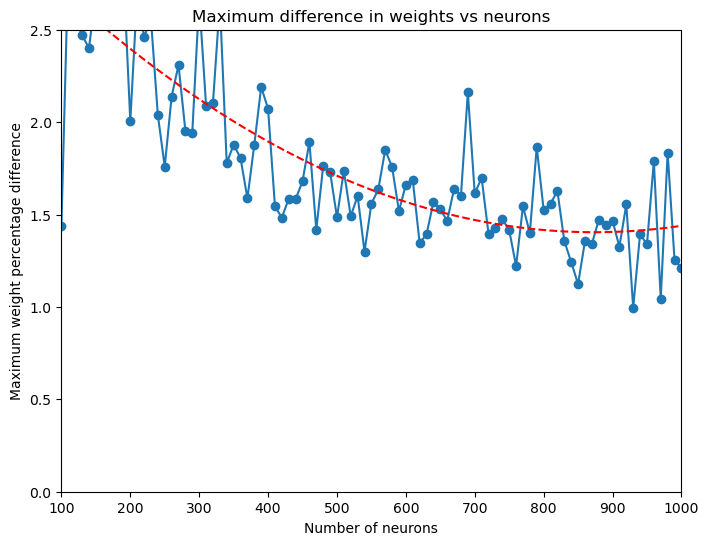

In [15]:
import matplotlib.pyplot as plt

max_vals = []

for i in range(len(diff_weights) - 1):
    max_vals.append(np.max(diff_weights[i]))

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))

# create the plot
ax.plot(unit_range, max_vals, linestyle='-', marker='o')

# set the title and axis labels
ax.set_title('Maximum difference in weights vs neurons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Maximum weight percentage difference')
ax.set_ylim([0, 2.5])
ax.set_xlim([100, 1000])

# calculate line of best fit
coefficients = np.polyfit(unit_range, max_vals, 2)
line_of_best_fit = coefficients[0] * unit_range**2 + \
    coefficients[1] * unit_range + coefficients[2]

# plot line of best fit
ax.plot(unit_range, line_of_best_fit, linestyle='--', color='red')

# display the plot
plt.show()


In [23]:
np.random.seed(42)
X = np.random.rand(100, 20)  # 100 5-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

In [25]:
# Expirement 1: Does using 10 layers of 100 neurons each or 1 layer of 1000 neurons cause lazy training more?

units = 1000
print(f"Number of units: {units}")
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=units, activation='relu', input_shape=(20,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

# Print initial weights:
initial_weights_1000 = model.layers[0].get_weights()[0]
# Compile model with loss function and optimizer:

# Instantiate the callback:
my_callback = MyThresholdCallback(threshold=0.005)

model.compile(loss='binary_crossentropy', optimizer = 'adam',  metrics=['accuracy'])

model.fit(X, y, epochs=400, batch_size=1,
          callbacks=[my_callback], verbose=1)

# Print out final weights and compute differences:
final_weights_1000 = model.layers[0].get_weights()[0]
diff_weights_1000 = final_weights_1000 - initial_weights_1000

Number of units: 1000
Epoch 1/400


2023-04-20 09:47:40.525052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7181 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.5600
Epoch 4/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6571 - accuracy: 0.6500
Epoch 5/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6306 - accuracy: 0.6400
Epoch 6/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.6400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.7100
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6161 - accuracy: 0.6700
Epoch 9/400
100/100 [==============================] - 0s 5ms/step - loss: 0.5823 - accuracy: 0.7300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.5635 - accuracy: 0.7600
E

In [26]:
units_per_layer = 500
layers = 2
print(f"Number of units per layer: {units_per_layer}")
print(f"Number of layers: {layers}")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = units_per_layer, activation = 'relu', input_shape = (10,)))
for _ in range(layers - 1):
    model.add(tf.keras.layers.Dense(units = units_per_layer, activation = 'relu'))

# Grab the random initialization of the weights:
initial_weights_ml = []
for i in range(layers):
    initial_weights_ml.append(model.layers[i].get_weights())

# Compile and fit the model:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X, y, epochs=5000, batch_size=1,
          callbacks=[my_callback], verbose=1)

# Grab the final position of the weights:
final_weights_ml = []
for i in range(layers):
    initial_weights_ml.append(model.layers[i].get_weights())

# Find the difference for each layer:
diff_weights_ml = []
for i in range(layers):
    diff_weights_ml.append(np.linalg.norm(initial_weights_ml[i]-final_weights_ml[i]))
diff_weights_ml = final_weights_ml - initial_weights_ml 

Number of units per layer: 500
Number of layers: 2
Epoch 1/5000


2023-04-20 09:48:14.942016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 2.8636 - accuracy: 0.0000e+00
Epoch 2/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.5602 - accuracy: 0.0000e+00
Epoch 3/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.5275 - accuracy: 0.0000e+00
Epoch 4/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.4694 - accuracy: 0.0000e+00
Epoch 5/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.4407 - accuracy: 0.0000e+00
Epoch 6/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.4075 - accuracy: 0.0000e+00
Epoch 7/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.3859 - accuracy: 0.0000e+00
Epoch 8/5000
100/100 [==============================] - 1s 5ms/step - loss: 2.3736 - accuracy: 0.0000e+00
Epoch 9/5000
100/100 [==============================] - 1s 6ms/step - loss: 2.3528 - accuracy: 0.0000e+00
Epoch 10/5000
100/100 [==============================] - 1s

KeyboardInterrupt: 

In [59]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

initial_weights_test = []
final_weights_test = []

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

initial_weights_test.append(model.layers[0].get_weights()[0])
my_callback = MyThresholdCallback(threshold = 0.005)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y, epochs = 5000, callbacks = [my_callback], verbose = 1)

final_weights_test.append(model.layers[0].get_weights()[0])

Epoch 1/5000


2023-04-20 11:01:10.834194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 107ms/step - loss: 0.7612 - accuracy: 0.4800
Epoch 2/5000
4/4 [==============================] - 0s 10ms/step - loss: 0.7367 - accuracy: 0.4900
Epoch 3/5000
4/4 [==============================] - 0s 14ms/step - loss: 0.7157 - accuracy: 0.4500
Epoch 4/5000
4/4 [==============================] - 0s 8ms/step - loss: 0.7097 - accuracy: 0.4500
Epoch 5/5000
4/4 [==============================] - 0s 12ms/step - loss: 0.6996 - accuracy: 0.4500
Epoch 6/5000
4/4 [==============================] - 0s 11ms/step - loss: 0.6964 - accuracy: 0.5000
Epoch 7/5000
4/4 [==============================] - 0s 11ms/step - loss: 0.6942 - accuracy: 0.5500
Epoch 8/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5800
Epoch 9/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5800
Epoch 10/5000
4/4 [==============================] - 0s 7ms/step - loss: 0.6892 - accuracy: 0.5800
Epoch 11/5000
4/4 [======

KeyboardInterrupt: 

In [32]:
test = model.layers[0].get_weights()

In [43]:
print(test[1])


[-0.02250104  0.00305455  0.21944875 -0.02577766  0.13560972  0.
  0.2950616  -0.0424156   0.17129792  0.15771219  0.          0.38016558
  0.          0.01109559 -0.15281461  0.          0.00649098  0.05851829
  0.29047042 -0.15302852  0.07225373  0.25837857 -0.00511586  0.06466524
  0.10848103  0.04098411  0.0314424   0.03014393  0.29828316  0.21361874
  0.3237483   0.34096578  0.03848141 -0.0776668  -0.00989419  0.1529124
  0.         -0.15927102  0.13150883  0.         -0.04805387  0.02253612
  0.          0.09538408  0.32028672 -0.12052732  0.37731996 -0.15738606
 -0.2495309   0.          0.32117075 -0.01130254  0.29529643  0.41526386
  0.15592194  0.         -0.02847361  0.         -0.29045665  0.08563837
  0.15266955 -0.02882127  0.04676012 -0.0426581   0.02646232 -0.07038983
 -0.00815713 -0.13468824  0.44410458  0.20135912 -0.07395933  0.04606025
  0.          0.         -0.37820005 -0.05407276  0.27869087 -0.15408728
 -0.5066877  -0.0476266  -0.02744107 -0.06955505 -0.18370709

In [49]:
print(np.shape(model.layers[0].get_weights()[0]))

(10, 100)


In [52]:
result = initial_weights_test - final_weights_test 

In [53]:
print(np.linalg.norm(result))

13.801477


In [65]:
np.shape(model.layers[0].get_weights()[1])

(500,)

In [61]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

initial_weights = []
final_weights = []
unit_range = np.linspace(100, 500, 10)

diff_weights = []

for units in unit_range:
    print(f"Number of units: {int(units)}")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=units, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])

    # Print initial weights:
    initial_weights.append(model.layers[0].get_weights()[0])
    # Compile model with loss function and optimizer:

    # Instantiate the callback:
    my_callback = MyThresholdCallback(threshold=0.005)

    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    model.fit(X, y, epochs=400, batch_size=1, callbacks=[my_callback], verbose=1)

    # Print out final weights and compute differences:
    final_weights.append(model.layers[0].get_weights()[0])
    diff_weights.append(np.linalg.norm(final_weights[-1] - initial_weights[-1]))

Number of units: 100
Epoch 1/400


2023-04-20 11:02:45.906163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 6ms/step - loss: 0.7301 - accuracy: 0.4500
Epoch 2/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6958 - accuracy: 0.5100
Epoch 3/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6952 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6849 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6782 - accuracy: 0.5800
Epoch 6/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6690 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6637 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6583 - accuracy: 0.5700
Epoch 10/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6517 - accuracy: 0.6300
E

2023-04-20 13:01:09.167447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7056 - accuracy: 0.5100
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6805 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6645 - accuracy: 0.6500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6565 - accuracy: 0.5900
Epoch 10/400
100/100 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.6400
E

2023-04-20 13:03:07.096643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6774 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6652 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6584 - accuracy: 0.6400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6539 - accuracy: 0.6200
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6500
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.6600
E

2023-04-20 13:48:55.077503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7210 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5700
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6200
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6560 - accuracy: 0.6600
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6514 - accuracy: 0.6000
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6413 - accuracy: 0.6500
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.6900
E

2023-04-20 14:07:42.421480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 2s 5ms/step - loss: 0.7161 - accuracy: 0.5000
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5800
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5400
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.6200
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6614 - accuracy: 0.6500
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6700
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.6500
E

2023-04-20 15:25:28.667527: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7264 - accuracy: 0.4400
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.5300
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6790 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5600
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6680 - accuracy: 0.5900
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6607 - accuracy: 0.5900
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.5900
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6520 - accuracy: 0.6100
Epoch 9/400
100/100 [==============================] - 1s 5ms/step - loss: 0.6545 - accuracy: 0.6300
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6407 - accuracy: 0.6500
E

2023-04-20 16:24:52.540218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7096 - accuracy: 0.4900
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5600
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6731 - accuracy: 0.5900
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.6300
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6592 - accuracy: 0.6400
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6000
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.6400
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.5800
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.6800
E

2023-04-20 17:15:57.565009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7251 - accuracy: 0.5200
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.4900
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.5700
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6100
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6672 - accuracy: 0.5600
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.5700
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.6500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6457 - accuracy: 0.5900
Epoch 9/400
100/100 [==============================] - 712s 7s/step - loss: 0.6434 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.6100


2023-04-20 18:43:35.545850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 5ms/step - loss: 0.7115 - accuracy: 0.4600
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5500
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5500
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6727 - accuracy: 0.6400
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6100
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6552 - accuracy: 0.6100
Epoch 7/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.5500
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6582 - accuracy: 0.6300
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6446 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6334 - accuracy: 0.6500
E

2023-04-20 20:24:44.622505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 1s 7ms/step - loss: 0.7184 - accuracy: 0.5700
Epoch 2/400
100/100 [==============================] - 0s 4ms/step - loss: 0.7038 - accuracy: 0.5200
Epoch 3/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5800
Epoch 4/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.5500
Epoch 5/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6710 - accuracy: 0.5300
Epoch 6/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.6000
Epoch 7/400
100/100 [==============================] - 1039s 10s/step - loss: 0.6478 - accuracy: 0.6300
Epoch 8/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6476 - accuracy: 0.6200
Epoch 9/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6350 - accuracy: 0.6600
Epoch 10/400
100/100 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.630

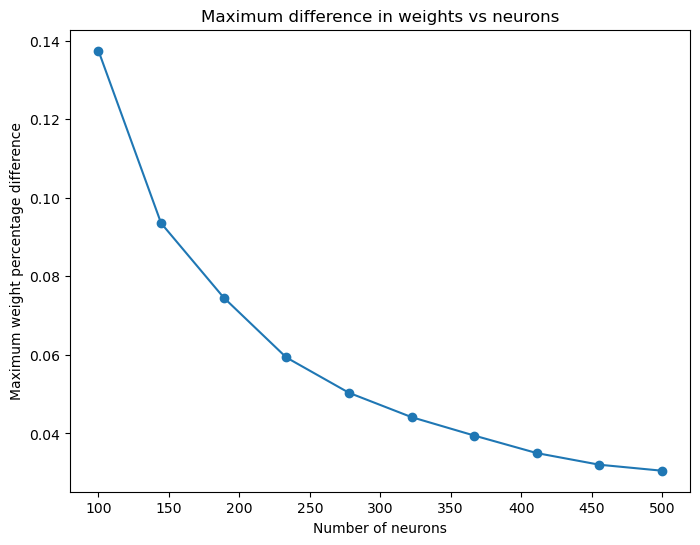

In [62]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize=(8, 6))

count = 0
for units in unit_range:
    diff_weights[count] = diff_weights[count] / units 
    count = count + 1



# create the plot
ax.plot(unit_range, diff_weights, linestyle='-', marker='o')

# set the title and axis labels
ax.set_title('Maximum difference in weights vs neurons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Maximum weight percentage difference')


# display the plot
plt.show()